<a href="https://colab.research.google.com/github/danielsfer/pythoncoding/blob/main/Finances_Codding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***NPV, Payback and IRR Calculations - Loans, Corporate Bonds, TVM and Capital Budgeting***


***NPV Evaluation Algorithm***


NPV = 38.71
Project Accepted


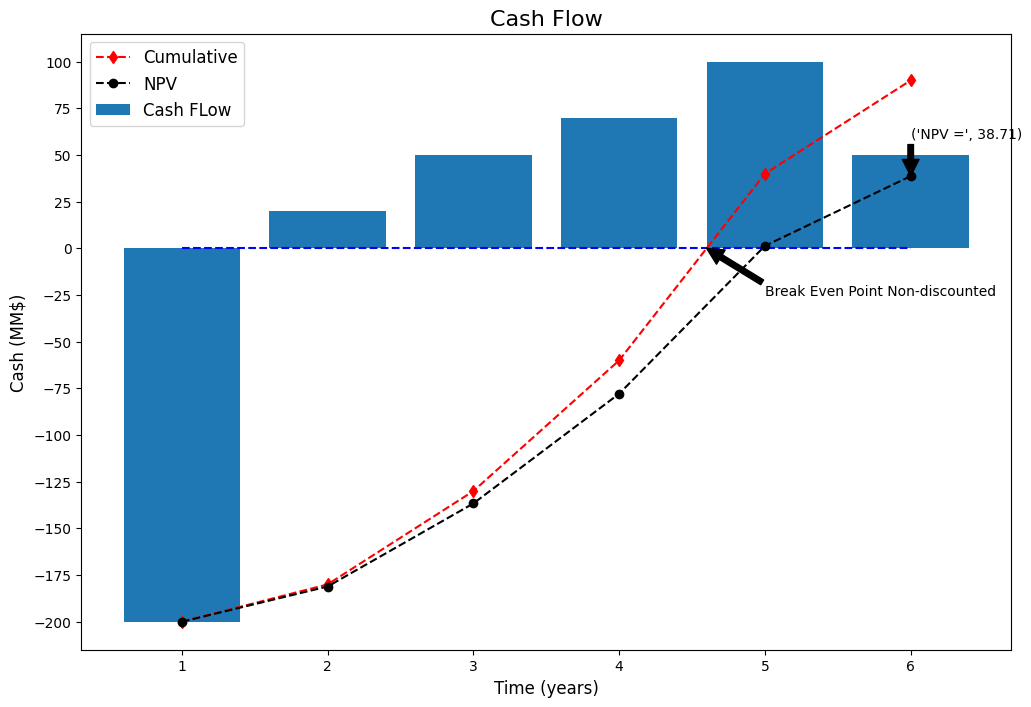

In [ ]:
#Values From Databank
cf = [-200,20,50,70,100,50]    
r= 0.06

#Calculate NPV
NPVcalc = 0;
NPVline = []
for k in range(len(cf)): 
  NPVcalc += cf[k]/((1+r)**(k)) #PV given A
  NPVline.append(NPVcalc)
print ('NPV =', round(NPVcalc,2))
if NPVcalc < 0:
  print('Project Rejected')
else:
  print('Project Accepted')

import matplotlib.pyplot as plt

# Cumulative Cash Flow Non-Discounted
cf_cum =[]
cumul = 0
for i in cf:
  cumul += i
  cf_cum.append(cumul)

# Plotting
x_axis = list(range(1,7))
plt.figure(figsize = (12,8))
#plt.grid()
plt.hlines(y=0,xmin = x_axis[0],xmax = x_axis[-1],linestyles = "dashed", color = "b")
plt.title("Cash Flow", fontsize = 16)
plt.xlabel("Time (years)", fontsize = 12)
plt.ylabel("Cash (MM$)", fontsize = 12)
#plt.xticks(x_axis,labels = ["t0","t1","t2","t3","t4","t5"])
plt.yticks(range(-200,101,25))
plt.annotate("Break Even Point Non-discounted", xy = (4.6,0),xytext = (5,-25),arrowprops = {"color":"black"}, fontsize = 10)
plt.annotate(("NPV =", round(NPVcalc,2)), xy = (6,NPVcalc),xytext = (6,NPVcalc+20),arrowprops = {"color":"black"}, fontsize = 10)
plt.bar(x_axis,cf, label = "Cash FLow")
plt.plot(x_axis,cf_cum, color = "r", linestyle = "--",marker = 'd',label = "Cumulative")
plt.plot(x_axis,NPVline, color = "black", linestyle = "--",marker = 'o',label = "NPV")
plt.legend(loc = "best", fontsize = 12)
plt.show()

***Payback Evaluation Algorithm***


In [ ]:
#Values From Databank
#cf = [-250,20,50,70,100,50]
#r = 0.05

#Calculate Payback
NPV = 0
cf_cum = 0
Payback = 0
for k in range(len(cf)): 
  NPV += cf[k]/((1+r)**k) #PV given A
  cf_cum += cf[k]
  print ("Cash Flow",k,"=",cf_cum)
  if cf_cum > 0 and Payback < 1:
    slope = (cf_cum-(cf_cum-cf[k]))/(k-(k-1))
    t = -((cf_cum-cf[k])/slope - (k-1)) + 1
    Payback = 1
  elif k==len(cf)-1 and Payback < 1:
    print ("The project does not break-even")
    break
if Payback > 0:
  print ("Payback Time = {} years".format(round(t,2)))

if t > 2:
  print('Project Rejected')
else:
  print('Project Accepted')

Cash Flow 0 = -200
Cash Flow 1 = -180
Cash Flow 2 = -130
Cash Flow 3 = -60
Cash Flow 4 = 40
Cash Flow 5 = 90
Payback Time = 4.6 years
Project Rejected


***IRR Search Algorithm*** 

NPV = -0.0
IRR =  11.9069%
Project Accepted


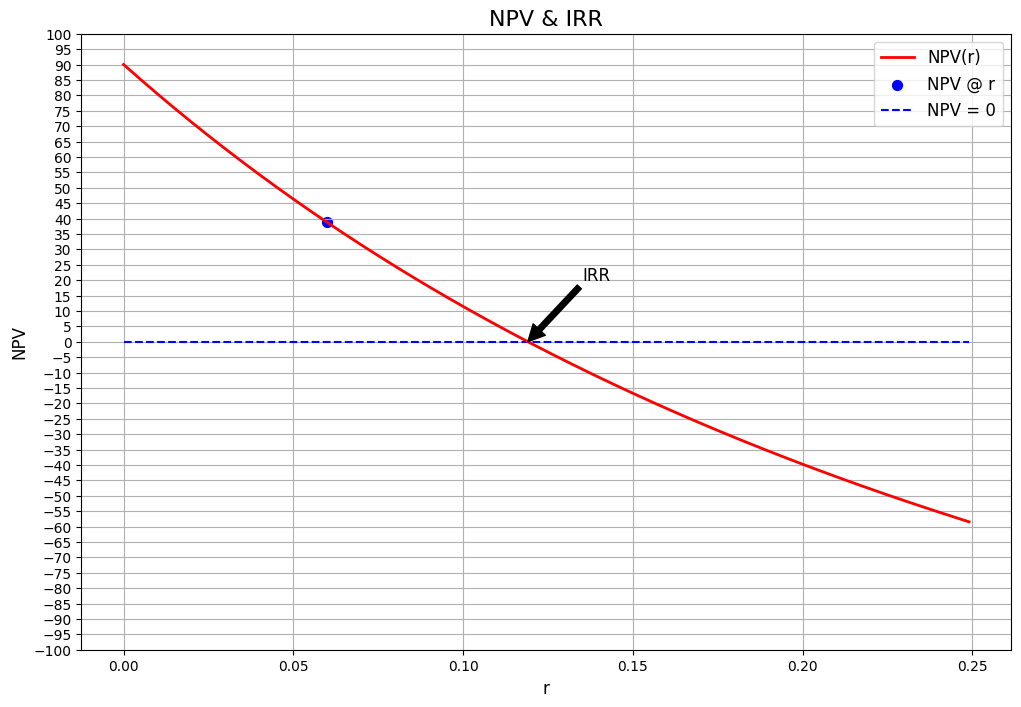

In [ ]:
##Values From Databank
#cf = [-200,20,50,70,100,50]  

irr = 0.000001 #guess
step = 0.0000001 #step for search
ireq = 0.05 #interest required for project approval

TargetNPV = 0
limit = 0.00001

##Calculate NPV and Find IRR
NPV = 0;
while True:
  for k in range(len(cf)): 
    NPV += cf[k]/((1+irr)**k) #PV given A
    #print('NPV',k,'=',NPV)
  #print ('Interest:',round(i,3))
  
  diff = NPV - TargetNPV
  if abs(diff) > limit:
    if diff < 0:
      irr -=step
    elif diff>0: 
      irr +=step
  else:
    break
  NPV = 0

print ('NPV =', round(NPV,4))
print ('IRR = ',"{:.4%}".format(irr))

##Project Acceptance
if ireq > irr:
  print('Project Rejected')
else:
  print('Project Accepted')

## Filling interest vector for plot
rs = []
maxr = 25
ilist = list(range(0,maxr*10))
for i in ilist:
  rs.append(i/1000)
## Filling NPV vector for plot
npvs = []
for i in rs:
  npv = 0
  for j in range(len(cf)):
    npv += cf[j]/(1+i)**(j)
  npvs.append(npv)

#Plot
plt.figure(figsize = (12,8))
plt.scatter (x = r, y = NPVcalc, s = 50, color= "blue", marker = "o", label = "NPV @ r")
plt.plot(rs, npvs, color = "red", linewidth = 2, linestyle = "-", label = "NPV(r)")
plt.grid()
plt.hlines(y = 0, xmin = rs[0], xmax = rs[-1],linestyles = "--",color = 'b',label = "NPV = 0")
plt.title("NPV & IRR", fontsize = 16)
plt.xlabel("r", fontsize = 12)
plt.ylabel("NPV", fontsize = 12)
plt.yticks(range(-100,101,5))
plt.annotate("IRR", xy = (irr,0), xytext = (0.135,20), arrowprops = {'color':'black'}, fontsize = 12)
plt.legend(loc="best",fontsize = 12)
plt.style.use('default')
plt.show()

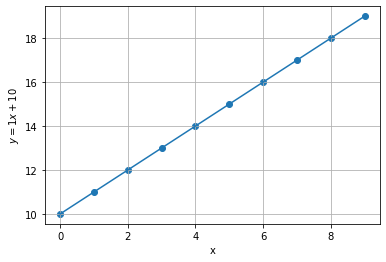

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear (x, a, b):
  y = a*x+b
  plt.scatter (x,y)
  plt.plot (x,y)
  plt.xlabel('x')
  plt.ylabel('$y = {}x+{}$'.format(a,b))
  plt.grid()
  return y

x = np.arange(10)
a = 1
b = 10
y = linear(x,1,10)

## ***Statistics and Distributions***

***Distributions and Intervals***

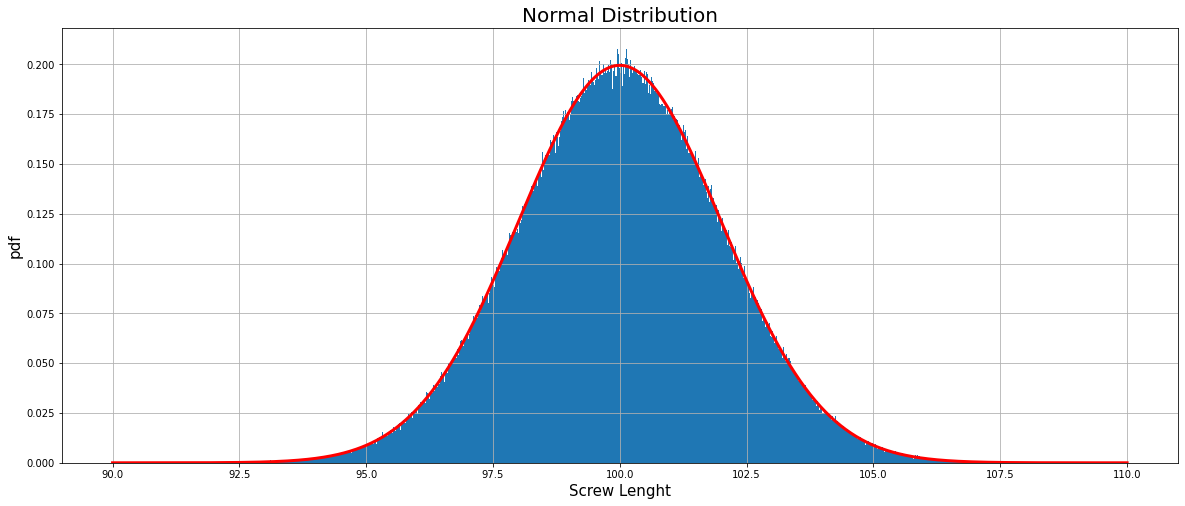

1.6448536269514722

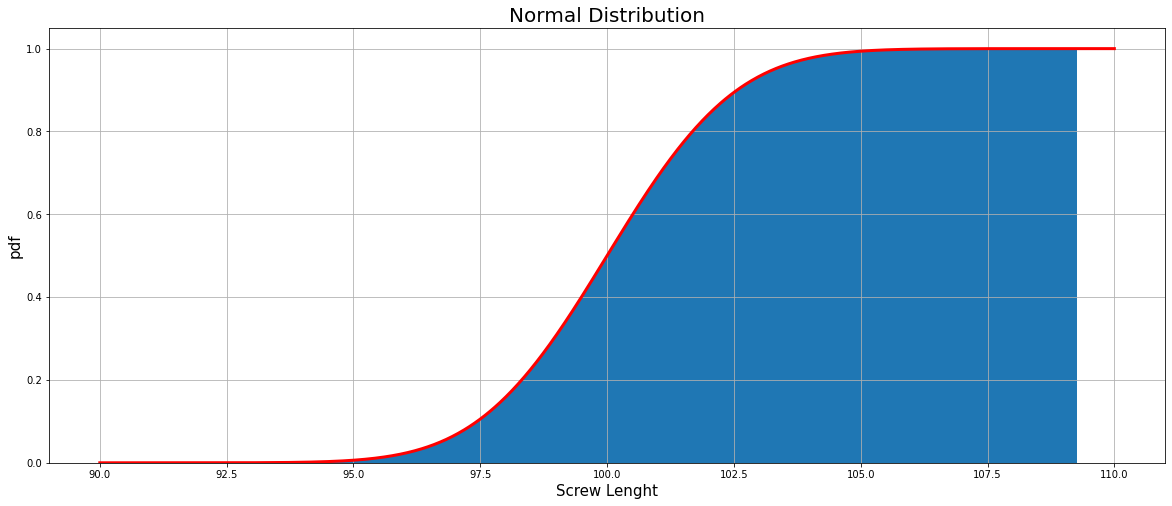

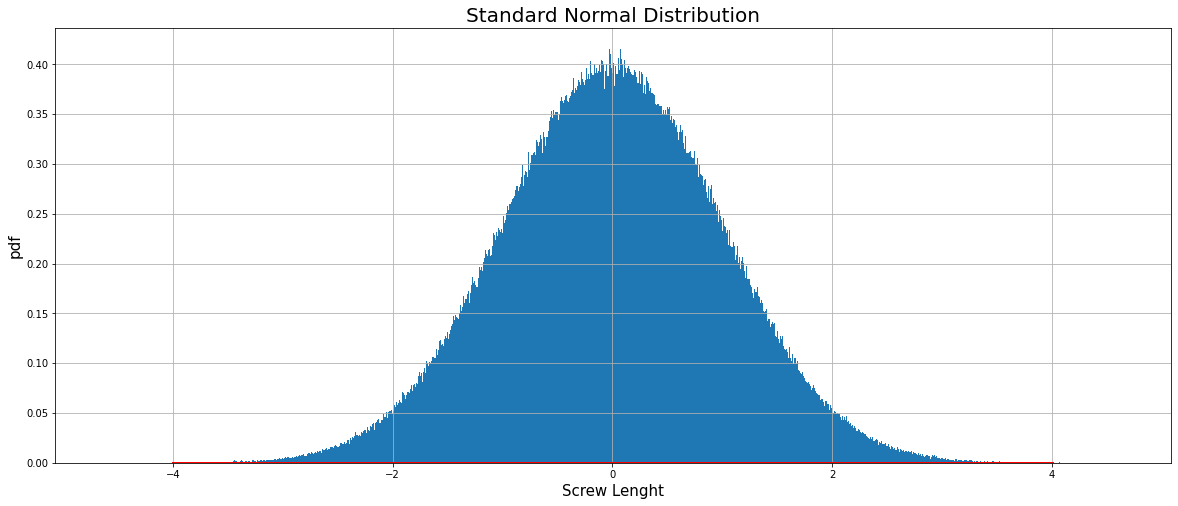

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Population Parameters
mi = 100
sigma = 2
size = 1000000

#Random seeding
np.random.seed(123)
pop = np.random.normal(loc = mi, scale = sigma, size = size)

#Parameter check
#pop.mean()
#pop.std()

import scipy.stats as stats

#Statistical Parameters evaluation
stats.skew(pop)
stats.kurtosis(pop)
stats.kurtosis(pop, fisher= False)
stats.describe(pop)

#Charts - Histogram
x = np.linspace(90,110,1000)
y = stats.norm.pdf(x,loc=mi,scale=sigma)

plt.figure(figsize=(20,8))
plt.hist(pop,bins=1000,density=True) #to evaluate absolute values, just turn density off
plt.plot(x,y,linewidth=3,color="red")
plt.grid()
plt.title("Normal Distribution",fontsize=20)
plt.xlabel("Screw Lenght", fontsize=15)
plt.ylabel("pdf",fontsize=15)
plt.show()

#Charts - Cumulative
y2 = stats.norm.cdf(x,loc=mi,scale=sigma)

plt.figure(figsize=(20,8))
plt.hist(pop,bins=1000,density=True,cumulative=True)
plt.plot(x,y2,linewidth=3,color="red")
plt.grid()
plt.title("Normal Distribution",fontsize=20)
plt.xlabel("Screw Lenght", fontsize=15)
plt.ylabel("pdf",fontsize=15)

#Z-Values
x3=np.linspace(-4,4,1000)
y3=stats.norm.pdf(x,loc=0,scale=1)
z = stats.zscore(pop)

plt.figure(figsize=(20,8))
plt.hist(z,bins=1000,density=True)
plt.plot(x3,y3,linewidth=3,color="red")
#plt.xticks(np.arange(4,5,1),
           #labels = ["-4σ=-4","-3σ=-3","-2σ=-2","-1σ=-1","mi=0","1σ=1","2σ=2","3σ=3","4σ=4"],
           #fontsize=15)
plt.grid()
plt.title("Standard Normal Distribution",fontsize=20)
plt.xlabel("Screw Lenght", fontsize=15)
plt.ylabel("pdf",fontsize=15)

#Z-Tests
stats.norm.cdf(x=105,loc=pop.mean(),scale=pop.std())
z = (105-pop.mean())/pop.std()
stats.norm.cdf(z) #Here you enter with the standard value and get the probability
stats.norm.ppf(0.95,loc=0,scale=1) #Here you enter with the probability and get the stardard value



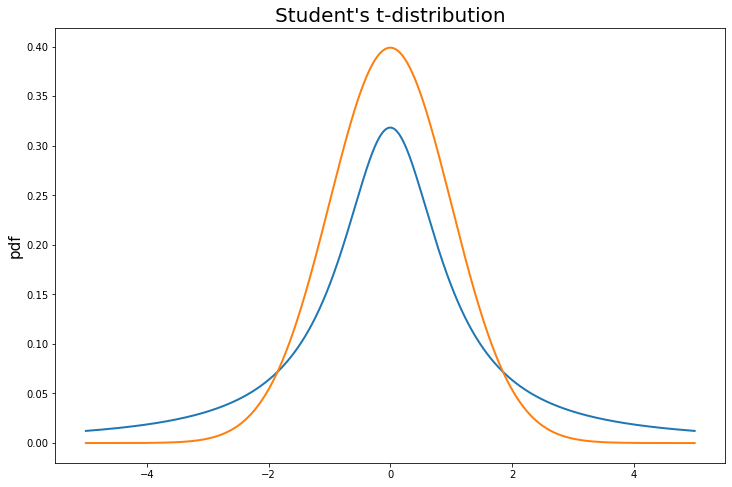

In [ ]:
#Point Estimates vs Confidence Interval Estimates
#1) Known Population Variances
#Knowing the sample size (n), the population std is known and the sample mean and std is known.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

point_est = 10 #sample.mean()
pop_std = 2
standard_error = 1 #pop_std/np.sqrt(sample_size)
conf = 0.9

left_z, right_z = stats.norm.interval(conf)
conf_int = (point_est + left_z*standard_error,point_est+right_z*standard_error)

stats.norm.interval(conf, loc=point_est, scale=standard_error) # this is the same of the rows above

###Student's T Distribution
##It replaces the need for the population std with the sample std. Because of this, Normal distribution is no longer acceptable, and a new model is needed.
##The confidence interval is broader (more incertainty), so mean+std of sample when compared to it has more room to be pop mean.

#2) Unknown Population Variances
#Knowing population data is hard, so Students T is suitable, but less precise.
sample_size = 50
point_est_mean = 10 #sample.mean()
point_est_std = 1 #sample.std(ddof=1)
standard_error = 0.05 #point_est_std/np/sqrt(sample_size)
left_t,right_t = stats.t.interval(conf,df=sample_size -1)

stats.t.interval(conf, loc = point_est_mean, scale=standard_error, df=sample_size-1) # this is the same of the row above

# Plotting a T distribution vs Normal
x = np.linspace(-5,5,1000)
t_2 = stats.t.pdf(x,df=2-1)
N = stats.norm.pdf(x)

plt.figure(figsize = (12, 8))
plt.plot(x,t_2,linewidth=2,label="Student's T (Sample: 2)")
plt.plot(x,N,linewidth=2,label="Standard Normal")
plt.title("Student's t-distribution",fontsize=20)
plt.ylabel("pdf",fontsize=15)
plt.show()


***Hypothesis Tests - Z-Tests***

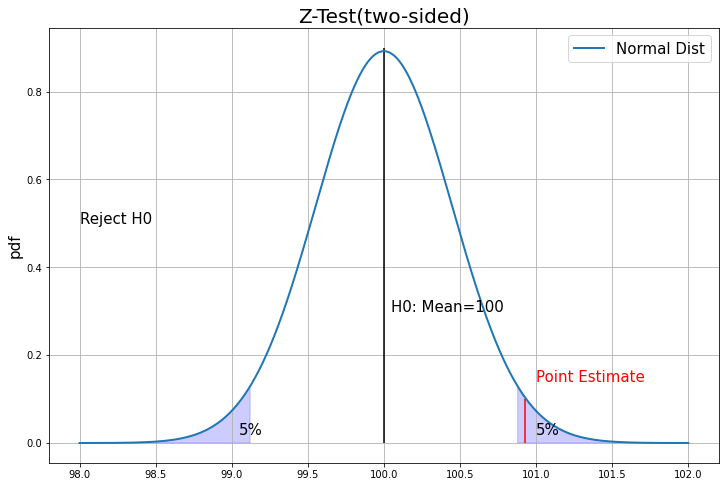

p_value =  3.78%


In [ ]:
##Z and T-Tests between a NULL Hypothesis (H0) and an Alternative Hypothesis (Ha)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Two-Tailed Z-Test

mi = 100.7 #unknown
pop_std = 2 # known
sample_size = 20 # known

np.random.seed(123)
sample = np.random.normal(loc = mi, scale = pop_std, size = sample_size)
point_est_mean = sample.mean()
standard_error = pop_std/np.sqrt(sample_size)

#H0: mean==100
#Ha: mean!=100

H0 = 100
conf=0.95
stats.norm.interval(conf,loc=H0,scale=standard_error)
left,right = stats.norm.interval(conf, loc=H0, scale=standard_error)

x = np.linspace(98,102,1000)
y = stats.norm.pdf(x,loc=H0,scale=standard_error)

plt.figure(figsize = (12, 8))
plt.plot(x,y,linewidth=2,label="Normal Dist")
plt.vlines(x=H0,ymin=0,ymax=0.90)
plt.vlines(x=point_est_mean,ymin=0,ymax=0.1,color="red")
plt.fill_between(x,y,where = ((x>right)|(x<left)),color="blue",alpha=0.2)
plt.annotate("5%",xy=(99.05,0.02),fontsize=15)
plt.annotate("5%",xy=(101,0.02),fontsize=15)
plt.annotate("Reject H0",xy=(98,0.5),fontsize=15)
plt.annotate("H0: Mean=100",xy=(100.05,0.3),fontsize=15)
plt.annotate("Point Estimate",xy=(101,0.14),color="red",fontsize=15)
plt.grid()
plt.title("Z-Test(two-sided)",fontsize=20)
plt.ylabel("pdf",fontsize=15)
plt.legend(fontsize=15)
plt.show()

#The p-value, the smallest significance which H0 can be rejected (a probability) is given by:
z_stat = (point_est_mean - H0)/standard_error
p_value = 2*stats.norm.cdf(-abs(z_stat)) # the 2 is because of two-tail test
print("p_value = ", "{:.2%}".format(p_value)) #this means if the confidence was (100-p_value/2%), then H0 was ok.

#One-Tailed Z-Test
#In this case, we use de ppf function to perform only one side of the interval. 
#Also, for the right value, the conf must be used, as in the left value, 1-conf must be used
#The rest is completely the same.

#H0 = 100
#conf=0.95
#stats.norm.ppf(conf,loc=H0,scale=standard_error)
#right = stats.norm.ppf(conf, loc=H0, scale=standard_error) 


***Hypothesis Tests - T-Tests***

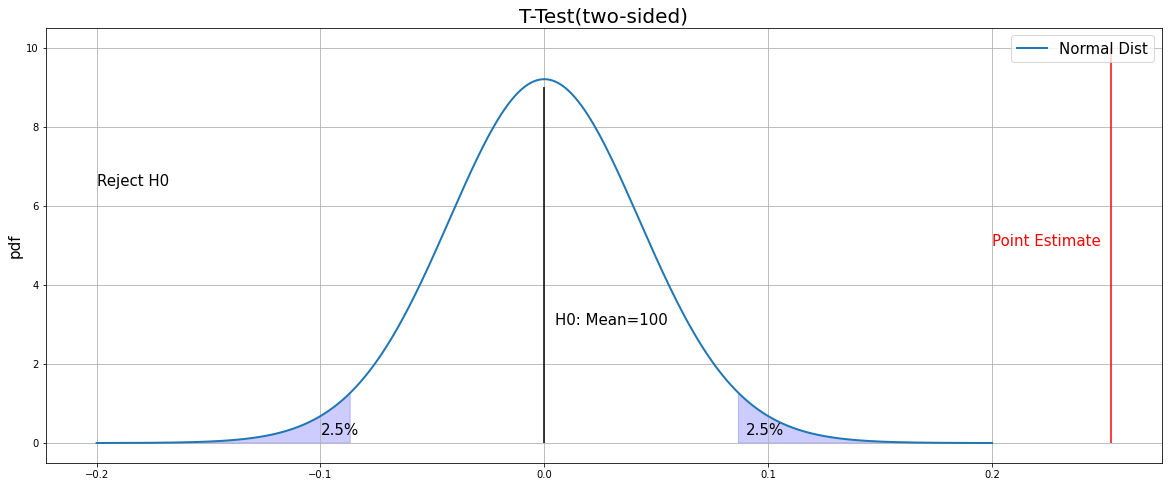

p_value =  0.00004%


In [ ]:
##Z and T-Tests between a NULL Hypothesis (H0) and an Alternative Hypothesis (Ha)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Two-Tailed Z-Test

#mi = #known
#pop_std = #unknown
sample_size = 50 # known
point_est_mean = 0.25318 #sample.mean()
standard_error = 0.043128 #sample.std(ddof=1)/np.sqrt(sample_size)

#H0: mean==0
#Ha: mean!=0

H0 = 0
conf=0.95
stats.t.interval(conf,loc=H0,scale=standard_error,df=sample_size-1)
left,right = stats.t.interval(conf, loc=H0, scale=standard_error,df=sample_size-1)

x = np.linspace(-0.2,0.2,1000)
y = stats.t.pdf(x,loc = H0,scale = standard_error,df = sample_size-1)

plt.figure(figsize = (20, 8))
plt.plot(x,y,linewidth=2,label="Normal Dist")
plt.vlines(x=H0,ymin=0,ymax=9)
plt.vlines(x=point_est_mean,ymin=0,ymax=10,color="red")
plt.fill_between(x,y,where = ((x>right)|(x<left)),color="blue",alpha=0.2)
plt.annotate("2.5%",xy=(-0.1,0.2),fontsize=15)
plt.annotate("2.5%",xy=(0.09,0.2),fontsize=15)
plt.annotate("Reject H0",xy=(-0.2,6.5),fontsize=15)
plt.annotate("H0: Mean=100",xy=(0.005,3),fontsize=15)
plt.annotate("Point Estimate",xy=(0.2,5),color="red",fontsize=15)
plt.grid()
plt.title("T-Test(two-sided)",fontsize=20)
plt.ylabel("pdf",fontsize=15)
plt.legend(fontsize=15)
plt.show()

#The p-value, the smallest significance which H0 can be rejected (a probability) is given by:
t_stat = (point_est_mean - H0)/standard_error
p_value = 2 * stats.t.cdf(-abs(t_stat),df=sample_size-1) # the 2 is because of two-tail test
#Another way to calculate is t_stat,p_value = stats.ttest_1samp(sample,H0)
print("p_value = ", "{:.5%}".format(p_value)) #this means if the confidence was (100-p_value/2%), then H0 was ok.

#One-Tailed T-Test
#In this case, we can use the quick way to calculate the test also, but p-value must be divided by 2


## ***Monte-Carlo Simulations & VaR***

###Basics of Matrix and User-Defined Functions

In [ ]:
pv = 100
r=0.04
n=6

#UserDefined Functions (def and return)
#If the parameter required is defined with an equal sign, for example nper=1, than this will be the default
#Also, if you want to return a list separated by created variables, you can pass into *args,a,b,c..., which inputs total-n variables into args
def future_value(pv,rate,nper):
  fv = pv*(1+rate)**nper
  return fv
print(future_value(pv=100,rate=0.04,nper=5))

def npv(rate, *args): #if args comes first, the passing of parameters at the end must be keyword oriented
  NPV = 0
  for i in range (len(args)):
    NPV+=args[i]/(1+rate)**(i)
  return NPV
print(npv(r,-200,20,50,70,100,50))
#To call a function inside another, simply write its name and pass the correct parameters


121.66529024000002
54.26509942956098


In [ ]:
#Complex Example

import numpy as np

##Payout Phase
m=12
cf_2 = 2500
n_2= 25
FV_2=100000
r_2=0.03

PV_2= np.pv(rate = r_2/m, nper=n_2*m ,pmt = cf_2 , fv=FV_2 , when = "begin")
print(PV_2)

##Funding Phase
m=12
n_1=35
FV_1=-PV_2
r_1=0.04
PV_1=0

cf_1=np.pmt(rate=r_1/m,nper=n_1*m,pv=PV_1,fv=FV_1)
print(cf_1)

##Writing a Function
def retirement (ret_income, ret_years,end_value, initial_funds,
                funding_years,rate_funding,rate_payout=None,m=12,
                payout_when="begin",funding_when="end"):
  
  if not rate_payout:
    rate_payout=rate_funding

  PV_2=np.pv(rate=rate_payout/m, nper=ret_years*m,
             pmt=ret_income,fv=end_value,when=payout_when)
  
  cf_1=np.pmt(rate=rate_funding/m,nper=funding_years*m,
              pv=-initial_funds,fv=-PV_2,when=funding_when)
  return cf_1

retirement (ret_income=2500, ret_years=25,end_value=100000, initial_funds=0,
                funding_years=35,rate_funding=0.04,rate_payout=0.03)


-575789.9978483317
-630.1526790408823


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).


-630.1526790408823

###VaR Calculations

In [ ]:
#Representation of the value at stake given a certain condition
#It is composed by a Loss Size, a Probability and a Time Period
#Basically it is a statistical analysis of multiple scenarios - Monte-Carlo method is widely used for this


 